UDP server up and listening (192.168.4.2)


<IPython.core.display.Javascript object>


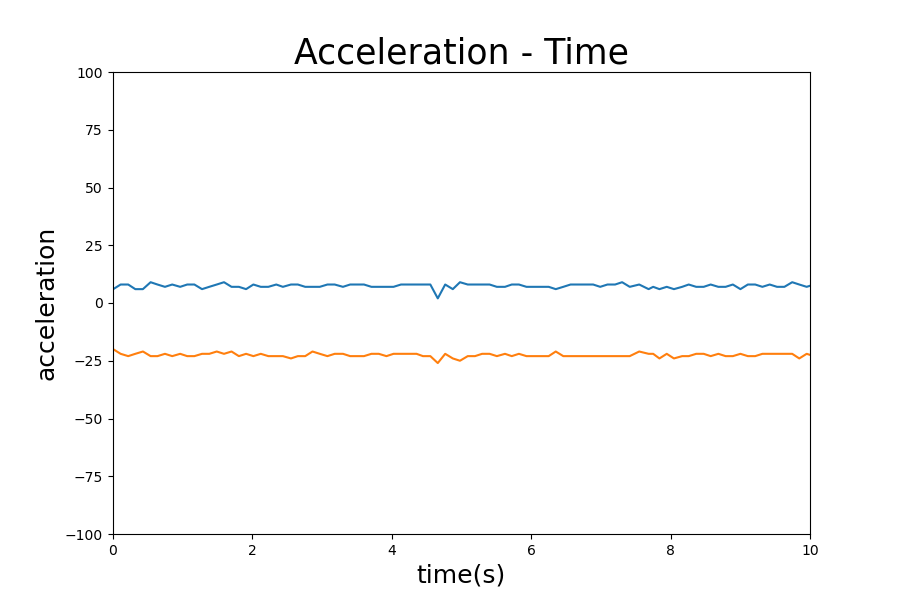

team TA


In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import socket

localIP     = '192.168.4.2'
localPort   = 7414

# Create a datagram socket
Server = socket.socket(family=socket.AF_INET, type=socket.SOCK_DGRAM)
Server.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
# Bind to address and ip
Server.bind((localIP, localPort))

print(f"UDP server up and listening ({localIP})")

plt.ion()

x = []
y = []
x_2 = []
y_2 = []
fig, ax = plt.subplots(figsize=(9,6))
line1, = ax.plot(x, y)
line2, = ax.plot(x_2, y_2)

plt.axis([0, 10, -100, 100])
plt.title("Acceleration - Time",fontsize=25)


plt.xlabel("time(s)",fontsize=18)
plt.ylabel("acceleration",fontsize=18)

first = False

while(True):
    
    data, address = Server.recvfrom(1024)
    if not first:
        time_start = time.time()
        first = True
        print(data.decode())
        Server.sendto('start'.encode(), address)
        continue
    if data.decode() == 'stop':
        break
    x.append(time.time() - time_start)
    y.append(float(eval(data.decode())[0]))
    x_2.append(time.time() - time_start)
    y_2.append(float(eval(data.decode())[1]))
    
    line1.set_xdata(x)
    line1.set_ydata(y)
    line2.set_xdata(x_2)
    line2.set_ydata(y_2)
    
    fig.canvas.draw()
    
    fig.canvas.flush_events()